<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

#  Introduction to Anomaly Detection in Python using PyOD(Project submitted as part of course completion with BBDS)



## Project Guide  
------------  
- [Project Overview](#project-overview)  
- [Part 1: Reading Data - Exploratory Data Analysis with Pandas](#I)
- [Part 2: Visual data analysis in Python](#II)
- [Part 3: Data Pre-processing &  Preparation](#III)
- [Part 4: Predictive Analytics](#IV)
- [Part 5: Optimization (Hyper Parameter Tuning)](#V)

In [1]:
# Roadmap for Building Machine Learning Models

# 1. Prepare Problem
# a) Define The Business Objective
# b) Select the datasets
# c) Load dataset
# d) Load libraries


# Data Pre-processing
# This is the first step in building a machine learning model. Data pre-processing refers to the transformation of data
# before feeding it into the model. It deals with the techniques that are used to convert unusable raw data into clean 
# reliable data.

# Since data collection is often not performed in a controlled manner, raw data often contains outliers 
# (for example, age = 120), nonsensical data combinations (for example, model: bicycle, type: 4-wheeler), missing values, 
# scale problems, and so on. Because of this, raw data cannot be fed into a machine learning model because it might 
# compromise the quality of the results. As such, this is the most important step in the process of data science.


# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transformation

# Model Learning
# After pre-processing the data and splitting it into train/test sets (more on this later), we move on to modeling. Models 
# are nothing but sets of well-defined methods called algorithms that use pre-processed data to learn patterns, which can 
# later be used to make predictions. There are different types of learning algorithms, including supervised, semi-supervised, 
# unsupervised, and reinforcement learning. These will be discussed later.

# 4. Modeling Strategy
# a) Select Suitable Algorithms
# b) Select Training/Testing Approaches
# c) Train 


# Model Evaluation
# In this stage, the models are evaluated with the help of specific performance metrics. With these metrics, we can go on to 
# tune the hyperparameters of a model in order to improve it. This process is called hyperparameter optimization. We will 
# repeat this step until we are satisfied with the performance.

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# Prediction
# Once we are happy with the results from the evaluation step, we will then move on to predictions. Predictions are made 
# by the trained model when it is exposed to a new dataset. In a business setting, these predictions can be shared with 
# decision makers to make effective business choices.

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# Model Deployment
# The whole process of machine learning does not just stop with model building and prediction. It also involves making use 
# of the model to build an application with the new data. Depending on the business requirements, the deployment may be a 
# report, or it may be some repetitive data science steps that are to be executed. After deployment, a model needs proper 
# management and maintenance at regular intervals to keep it up and running.

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use


<a id="I"></a>

# I.  Reading Data - Exploratory Data Analysis with Pandas

### Article outline
1. Demonstration of main Pandas methods
2. First attempt on predicting Bank churn
3. Useful resources

### 1. Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager
%matplotlib inline


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [2]:
MallCust = pd.read_csv('Mall_Customers.csv')
MallCust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
MallCust = MallCust.drop('CustomerID',axis=1)

In [4]:
MallCust = MallCust.rename(columns=
                           {
                            'Spending Score (1-100)':'Spend_Score',
                            'Annual Income (k$)':'Income'
                           })


In [5]:
MallCust = pd.get_dummies(MallCust)

In [6]:
MallCust_IS= MallCust[['Income', 'Spend_Score']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
MallCust_IS = scaler.fit_transform(MallCust_IS)

In [8]:
MallCust_IS

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

### Some Definitions:

1. An outlier is an observation with at least one variable having an unusual value.  
2. A univariate outlier is an observation with a variable that has an unusual value.  
3. A multivariate outlier is an observation with at least two variables having unusual values.  
These techniques identify outliers, so either univariate or multivariate outliers

In [9]:
X=MallCust_IS

In [10]:
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


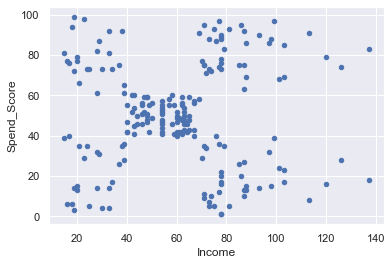

In [11]:
MallCust.plot.scatter('Income','Spend_Score')

## Angle-Based Outlier Detection (ABOD)
It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
ABOD performs well on multi-dimensional data
PyOD provides two different versions of ABOD:
Fast ABOD: Uses k-nearest neighbors to approximate
Original ABOD: Considers all training points with high-time complexity

## k-Nearest Neighbors Detector:
For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:
Largest: Uses the distance of the kth neighbor as the outlier score
Mean: Uses the average of all k neighbors as the outlier score
Median: Uses the median of the distance to k neighbors as the outlier score

## Isolation Forests

1. Randomly select a feature and randomly select a value for that feature within its range.  
2. If the observation’s feature value falls above (below) the selected value, then this value becomes the new min (max) of that feature’s range.  
3. Check if at least one other observation has values in the range of each feature in the dataset, where some ranges were altered via step 2. If no, then the observation is isolated.  
3. Repeat steps 1–3 until the observation is isolated. The number of times you had to go through these steps is the isolation number. The lower the number, the more anomalous the observation is

## Local Outlier Factor
LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.   
  
This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points. 
  
A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.  
  
In the below feature space, LOF is able to identify P1 and P2 as outliers, which are local outliers to Cluster 2 (in addition to P3).

In [20]:
from scipy import stats
from matplotlib import cm
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.auto_encoder import AutoEncoder
%matplotlib inline
#%matplotlib qt

In [23]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction),
        'Autoencoders:' :AutoEncoder(hidden_neurons =[25,10,2,10,25],hidden_activation='relu',output_activation='sigmoid',
                                     loss='mean_squared_error',optimizer='adam',dropout_rate=0.2,
                                     epochs=100,batch_size=32,l2_regularizer=0.1,validation_size=0.1,contamination=outliers_fraction)
}

OUTLIERS:  10 / INLIERS:  190 Angle-based Outlier Detector (ABOD)
OUTLIERS:  10 / INLIERS:  190 Cluster-based Local Outlier Factor (CBLOF)
OUTLIERS:  7 / INLIERS:  193 Feature Bagging
OUTLIERS:  9 / INLIERS:  191 Histogram-base Outlier Detection (HBOS)
OUTLIERS:  10 / INLIERS:  190 Isolation Forest
OUTLIERS:  7 / INLIERS:  193 K Nearest Neighbors (KNN)
OUTLIERS:  4 / INLIERS:  196 Average KNN
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2)                

6/6 [==============================] - 0s 9ms/step - loss: 1.0570 - val_loss: 1.2702
Epoch 57/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1066 - val_loss: 1.2692
Epoch 58/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1201 - val_loss: 1.2683
Epoch 59/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0510 - val_loss: 1.2675
Epoch 60/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0668 - val_loss: 1.2666
Epoch 61/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0967 - val_loss: 1.2657
Epoch 62/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0899 - val_loss: 1.2649
Epoch 63/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0534 - val_loss: 1.2640
Epoch 64/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0201 - val_loss: 1.2632
Epoch 65/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0731 - val_loss: 1.2625
Epoch 66/100
6/6 [===============

<Figure size 720x720 with 0 Axes>

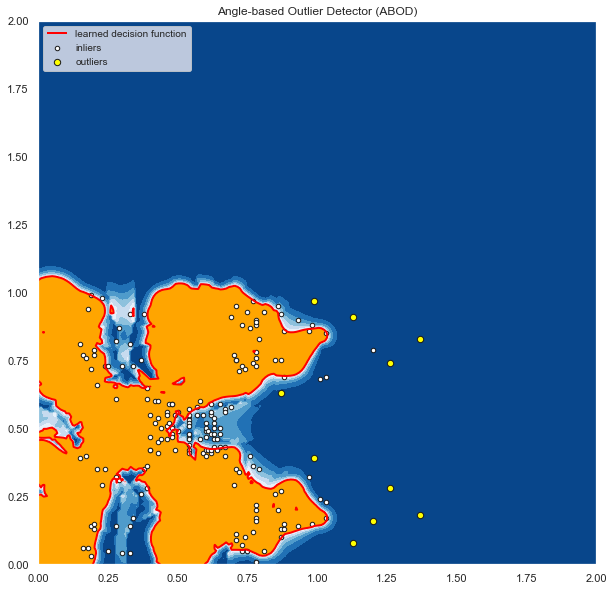

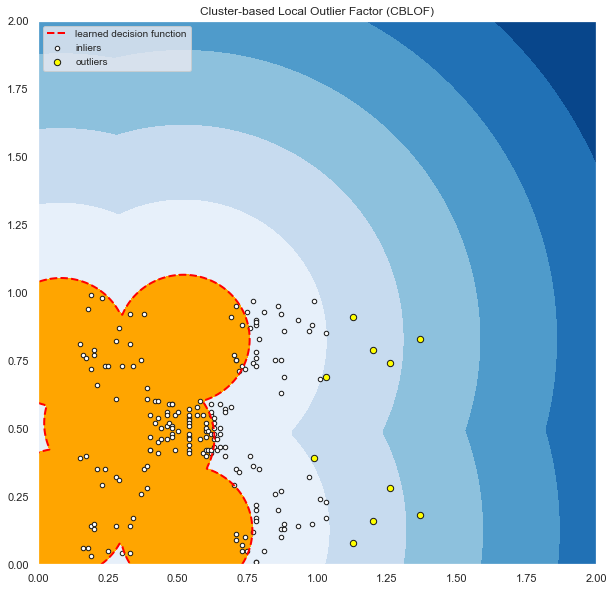

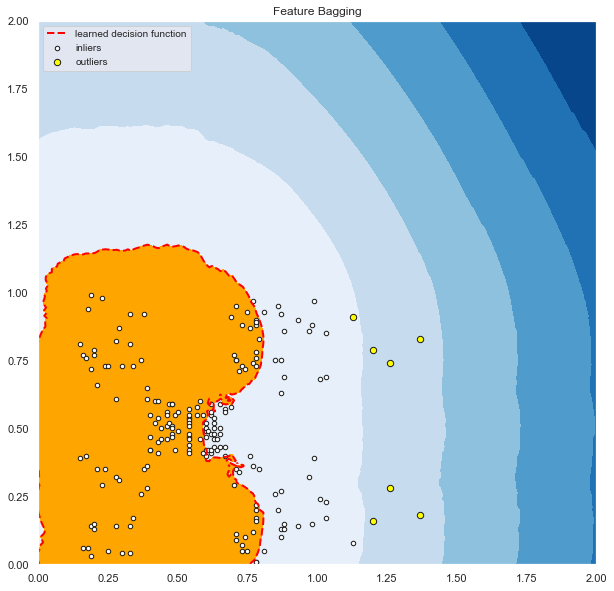

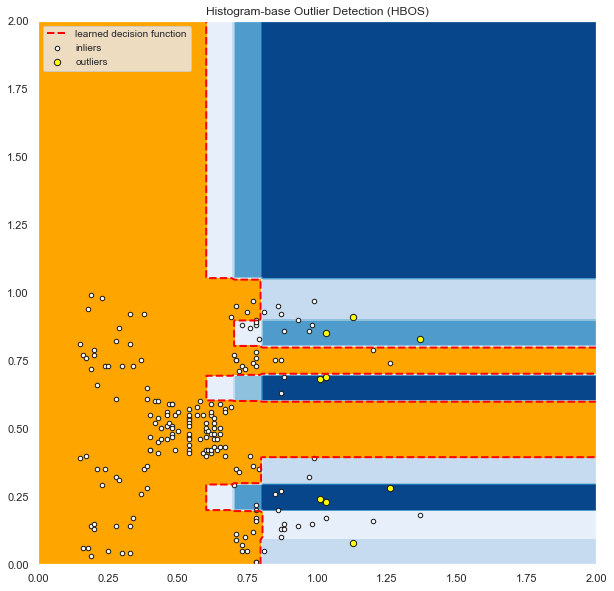

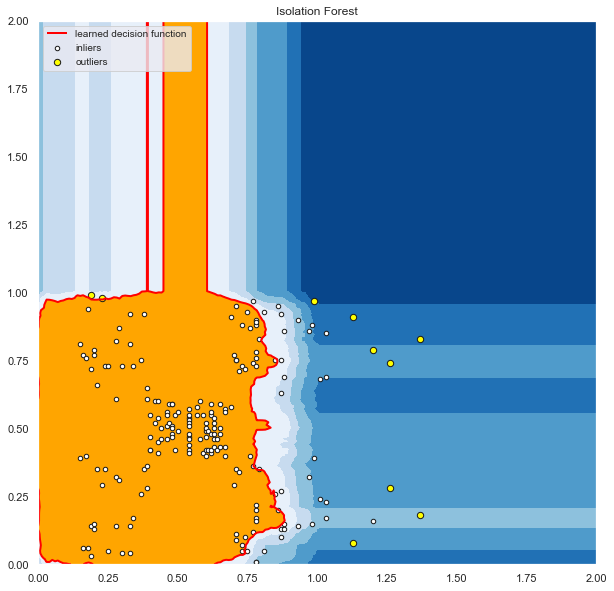

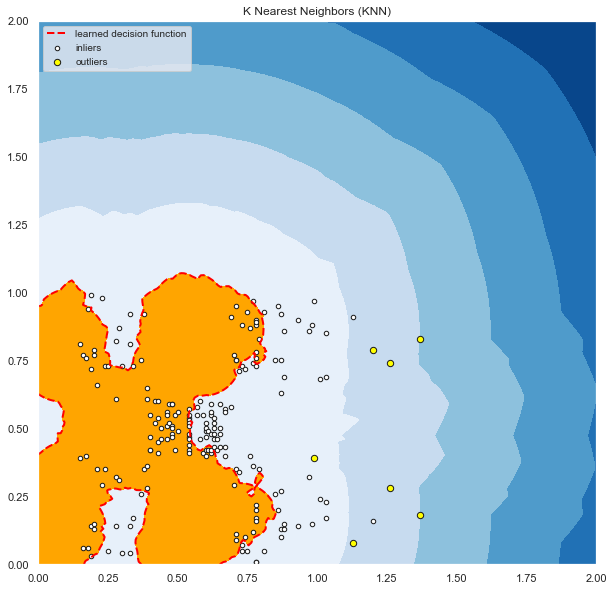

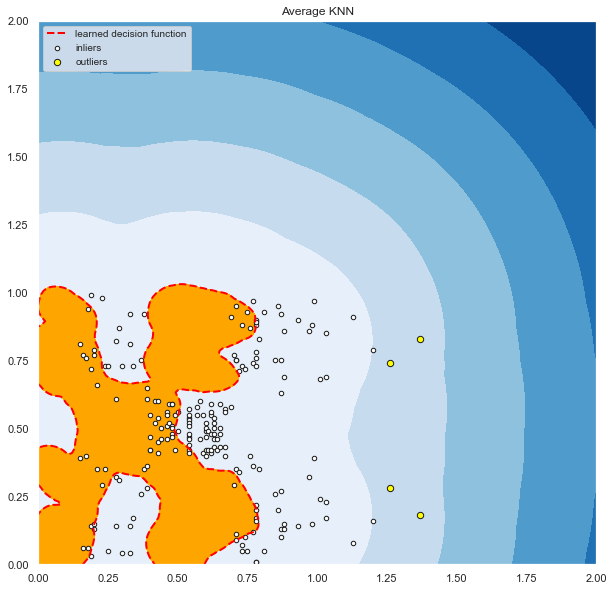

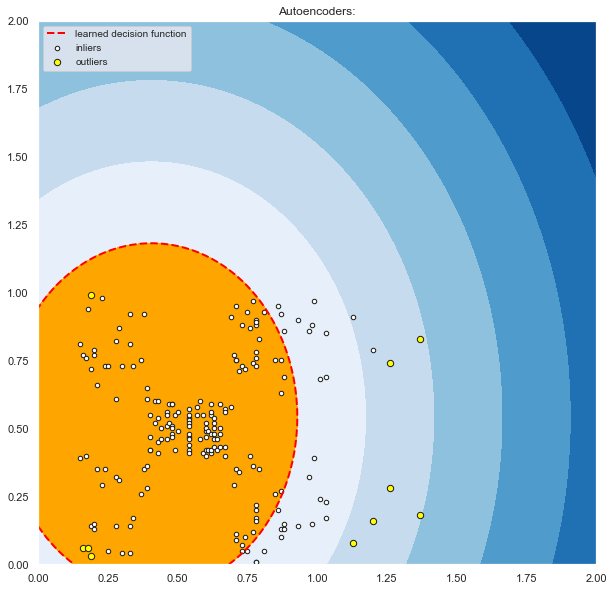

In [24]:
#autoscroll_set_on_load
plt.figure(figsize=(10,10))
xx , yy = np.meshgrid(np.linspace(0,2 ,200), np.linspace(0, 2,200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = MallCust
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Income'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Spend_Score'][dfx['outlier'] == 0]).reshape(-1,1)
    
    #print (IX1,IX2)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Income'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Spend_Score'][dfx['outlier'] == 1].values.reshape(-1,1)
    
    #print (OX1,OX2)
    
    print('OUTLIERS: ',n_outliers,'/','INLIERS: ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1/100,IX2/100, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1/100,OX2/100, c='yellow',s=40, edgecolor='k')
    
   # f=plt.figure()
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc=2)
      
    plt.xlim((0, 2))
    plt.ylim((0, 2))
    plt.title(clf_name)
    #plt.show()

